In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def interpolacao_polinomial(x_pontos, y_pontos):
  """
  Calcula os coeficientes de um polinomio interpolador.
  A função gera e resolve o sistema linear Ac = y, onde A é a matriz de Vandermonde.

  Args:
    x_pontos (np.array): Coordenadas x dos pontos.
    y_pontos (np.array): Coordenadas y dos pontos.

  Returns:
    np.array: Vetor de coeficientes do polinômio [c0, c1, ..., cn-1]
  """

  n = len(x_pontos)
  # Gera a matriz de Vandermonde A
  A = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      A[i, j] = x_pontos[i]**j

  # Resolve um sistema linear Ac = y para encontrar os coeficientes c
  c = np.linalg.solve(A, y_pontos)

  return c

In [ ]:
def avaliar_polinomio(coefs, x_valores):
  """Avalia o polinômio para um conjunto de valores x."""
  n = len(coefs)
  resultado = np.zeros_like(x_valores, dtype=float)
  for i in range(n):
    resultado += coefs[i] * (x_valores**i)
  return resultado

In [ ]:
def spline_cubica_natural(x_pontos, y_pontos):
  """
  Calcula os coeficientes para uma spline cúbica natural.
    A função resolve um sistema linear tridiagonal para encontrar as segundas derivadas
    e então calcula os coeficientes de cada segmento cúbico.

    Args:
        x_pontos (np.array): Coordenadas x dos pontos.
        y_pontos (np.array): Coordenadas y dos pontos.

    Returns:
        np.array: Matriz de coeficientes (n-1 x 4) onde cada linha é [ai, bi, ci, di].
  """

  n = len(x_pontos)
  # h representa a distância entre os pontos x consecutivos
  h = np.diff(x_pontos)

  # Monta a matriz tridiagonal A para o sistema que resolve as segundas derivadas (M)
  A = np.zeros((n-2, n-2))
  for i in range(n-2):
    A[i, i] = 2 * (h[i] + h[i+1])
    if i < n - 3:
      A[i, i+1] = h[i+1]
      A[i+1, i] = h[i+1]

  # Monta o vetor B do sistema AM = B
  B = np.zeros(n - 2)
  for i in range(n - 2):
    B[i] = 6 * ((y_pontos[i+2] - y_pontos[i+1]) / h[i+1] - (y_pontos[i+1] - y_pontos[i]) / h[i])

  # Resolve o sistema para encontrar as segundas derivadas nos pontos internos
    M_internos = np.linalg.solve(A, B)

    # M completo, com M0 = Mn-1 = 0 para a spline natural
    M = np.concatenate(([0], M_internos, [0]))

    # calcula os coeficientes de cada segmento da spline
    coefs = np.zeros((n - 1, 4))
    for i in range(n - 1):
        a_i = y_pontos[i]
        b_i = (y_pontos[i+1] - y_pontos[i]) / h[i] - h[i] * (2 * M[i] + M[i+1]) / 6
        c_i = M[i] / 2
        d_i = (M[i+1] - M[i]) / (6 * h[i])
        coefs[i, :] = [a_i, b_i, c_i, d_i]

    return coefs

In [ ]:
def avaliar_spline(x_pontos, coefs, x_valores):
  """Avalia a spline para um conjunto de valores x."""
  resultado = np.zeros_like(x_valores, dtype=float)
  for i, x in enumerate(x_valores):
    # Encontra o intervalo correto para o valor de x
    # Procura o primeiro x_ponto que é maior que x
    idx = np.searchsorted(x_pontos, x, side='right') - 1
    idx = max(0, min(idx, len(x_pontos) - 2))

    a, b, c, d = coefs[idx]
    dx = x - x_pontos[idx]
    resultado[i] = a + b * dx + c * dx**2 + d * dx**3

  return resultado

Pontos x: [0 1 2 3 4]
Pontos y: [2 1 3 5 1]
Coeficientes do Polinômio [c0, c1, c2, ...]: [ 2.    -2.75   1.625  0.25  -0.125]



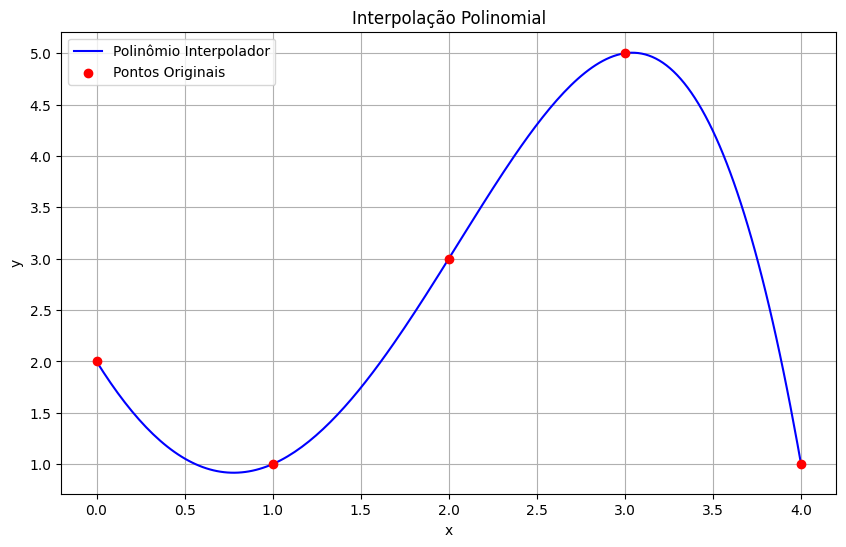

Pontos x: [0 1 2 3 4]
Pontos y: [2 1 3 5 1]
Coeficientes da Spline [a, b, c, d]:
[[ 2.     -1.8036  0.      0.8036]
 [ 1.      0.6071  2.4107 -1.0179]
 [ 3.      2.375  -0.6429  0.2679]
 [ 5.     -4.1071  0.1607 -0.0536]]


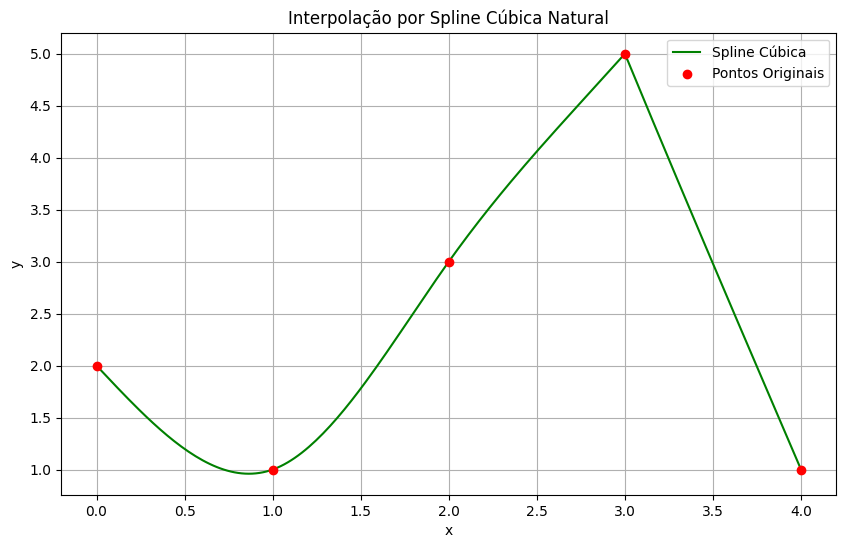

In [ ]:
x_teste_p = np.array([0, 1, 2, 3, 4])
y_teste_p = np.array([2, 1, 3, 5, 1])

coefs_p = interpolacao_polinomial(x_teste_p, y_teste_p)
print(f"Pontos x: {x_teste_p}")
print(f"Pontos y: {y_teste_p}")
print(f"Coeficientes do Polinômio [c0, c1, c2, ...]: {np.round(coefs_p, 4)}\n")

x_grafico = np.linspace(min(x_teste_p), max(x_teste_p), 200)
y_grafico_p = avaliar_polinomio(coefs_p, x_grafico)

plt.figure(figsize=(10, 6))
plt.plot(x_grafico, y_grafico_p, label='Polinômio Interpolador', color='blue')
plt.scatter(x_teste_p, y_teste_p, color='red', zorder=5, label='Pontos Originais')
plt.title('Interpolação Polinomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


x_teste_s = np.array([0, 1, 2, 3, 4])
y_teste_s = np.array([2, 1, 3, 5, 1])

coefs_s = spline_cubica_natural(x_teste_s, y_teste_s)
print(f"Pontos x: {x_teste_s}")
print(f"Pontos y: {y_teste_s}")
print("Coeficientes da Spline [a, b, c, d]:")
print(np.round(coefs_s, 4))

x_grafico_s = np.linspace(min(x_teste_s), max(x_teste_s), 200)
y_grafico_s = avaliar_spline(x_teste_s, coefs_s, x_grafico_s)

plt.figure(figsize=(10, 6))
plt.plot(x_grafico_s, y_grafico_s, label='Spline Cúbica', color='green')
plt.scatter(x_teste_s, y_teste_s, color='red', zorder=5, label='Pontos Originais')
plt.title('Interpolação por Spline Cúbica Natural')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()